In [ ]:
# Установка необходимых библиотек
!pip install pymysql sqlalchemy pandas matplotlib seaborn plotly

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

# Настройка стилей для графиков
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

# Параметры подключения к базе данных
DB_HOST = '95.131.149.21'
DB_PORT = 3306
DB_USER = 'mgpu_ico_etl_13'  # или ваш пользователь
DB_PASSWORD = 'XN53jRus'
DB_NAME = 'mgpu_ico_etl_13'

# Создаем подключение к базе
try:
    engine = create_engine(f'mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
    connection = engine.connect()
    print("✅ Успешное подключение к базе данных!")
except Exception as e:
    print(f"❌ Ошибка подключения: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.6 MB/s eta 0:00:00
✅ Успешное подключение к базе данных!


In [ ]:
# Запрос для анализа возвратов
query_returns = """
SELECT
    o.row_id,
    o.order_date,
    o.ship_date,
    o.ship_mode,
    o.sales,
    o.quantity,
    o.discount,
    o.profit,
    o.returned,
    o.state,
    o.city,
    o.product_id,
    c.product_id,
    c.customer_name,
    c.segment,
    c.country,
    c.region,
    p.category,
    p.sub_category,
    p.product_name
FROM orders o
LEFT JOIN customers c ON o.product_id = c.product_id
LEFT JOIN products p ON o.product_id = p.product_id;
"""

# Загружаем данные
df_returns = pd.read_sql(query_returns, connection)
print(" Данные по возвратам загружены. Размер:", df_returns.shape)
print(f"Всего записей: {len(df_returns)}")
df_returns.head()

 Данные по возвратам загружены. Размер: (1129, 20)
Всего записей: 1129


,row_id,order_date,ship_date,ship_mode,sales,quantity,discount,profit,returned,state,city,product_id,product_id,customer_name,segment,country,region,category,sub_category,product_name
0,15,2017-11-22,2017-11-26,Standard Class,68.81,5,0.8,-123.86,NaN,Texas,Fort Worth,OFF-AP-10002311,OFF-AP-10002311,Harold Pawlan,Home Office,United States,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...
1,16,2017-11-22,2017-11-26,Standard Class,2.54,3,0.8,-3.82,NaN,Texas,Fort Worth,OFF-BI-10000756,OFF-BI-10000756,Joe Kamberova,Consumer,United States,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders
2,35,2019-10-19,2019-10-23,Second Class,29.47,3,0.2,9.95,NaN,Texas,Houston,OFF-PA-10000249,OFF-PA-10000249,Susan Gilcrest,Corporate,United States,Central,Office Supplies,Paper,Easy-staple paper
3,35,2019-10-19,2019-10-23,Second Class,29.47,3,0.2,9.95,NaN,Texas,Houston,OFF-PA-10000249,OFF-PA-10000249,Matt Abelman,Home Office,United States,Central,Office Supplies,Paper,Easy-staple paper
4,36,2018-12-08,2018-12-10,First Class,1097.54,7,0.2,123.47,NaN,Texas,Richardson,TEC-PH-10004977,None,None,None,None,None,Technology,Phones,GE 30524EE4


In [ ]:
# Общая статистика по всем данным
total_orders = len(df_returns)
total_returns = df_returns['returned'].sum()
return_rate = (total_returns / total_orders * 100) if total_orders > 0 else 0
total_returned_sales = df_returns[df_returns['returned'] == 1]['sales'].sum()
total_returned_quantity = df_returns[df_returns['returned'] == 1]['quantity'].sum()
total_profit = df_returns['profit'].sum()
profit_on_returns = df_returns[df_returns['returned'] == 1]['profit'].sum()

print("ОБЩАЯ СТАТИСТИКА ВОЗВРАТОВ (ПО ВСЕМ ДАННЫМ):")
print(f"Всего заказов: {total_orders:,.0f}")
print(f"Всего возвратов: {total_returns:,.0f}")
print(f"Процент возвратов: {return_rate:.2f}%")
print(f"Сумма возвращенных товаров: ${total_returned_sales:,.2f}")
print(f"Количество возвращенных единиц: {total_returned_quantity:,.0f}")
print(f"Общая прибыль: ${total_profit:,.2f}")
print(f"Прибыль по возвратам: ${profit_on_returns:,.2f}")


ОБЩАЯ СТАТИСТИКА ВОЗВРАТОВ (ПО ВСЕМ ДАННЫМ):
Всего заказов: 1,129
Всего возвратов: 48
Процент возвратов: 4.25%
Сумма возвращенных товаров: $11,721.25
Количество возвращенных единиц: 194
Общая прибыль: $-30,042.53
Прибыль по возвратам: $-4,783.10


In [ ]:
df_returns_city = pd.read_sql(query_returns, connection)
print("Данные по возвратам загружены. Размер:", df_returns_city.shape)
print(f"Всего записей: {len(df_returns_city)}")
print(f"Колонки: {df_returns_city.columns.tolist()}")
df_returns_city.head()

Данные по возвратам загружены. Размер: (1129, 20)
Всего записей: 1129
Колонки: ['row_id', 'order_date', 'ship_date', 'ship_mode', 'sales', 'quantity', 'discount', 'profit', 'returned', 'state', 'city', 'product_id', 'product_id', 'customer_name', 'segment', 'country', 'region', 'category', 'sub_category', 'product_name']


,row_id,order_date,ship_date,ship_mode,sales,quantity,discount,profit,returned,state,city,product_id,product_id,customer_name,segment,country,region,category,sub_category,product_name
0,15,2017-11-22,2017-11-26,Standard Class,68.81,5,0.8,-123.86,NaN,Texas,Fort Worth,OFF-AP-10002311,OFF-AP-10002311,Harold Pawlan,Home Office,United States,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...
1,16,2017-11-22,2017-11-26,Standard Class,2.54,3,0.8,-3.82,NaN,Texas,Fort Worth,OFF-BI-10000756,OFF-BI-10000756,Joe Kamberova,Consumer,United States,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders
2,35,2019-10-19,2019-10-23,Second Class,29.47,3,0.2,9.95,NaN,Texas,Houston,OFF-PA-10000249,OFF-PA-10000249,Susan Gilcrest,Corporate,United States,Central,Office Supplies,Paper,Easy-staple paper
3,35,2019-10-19,2019-10-23,Second Class,29.47,3,0.2,9.95,NaN,Texas,Houston,OFF-PA-10000249,OFF-PA-10000249,Matt Abelman,Home Office,United States,Central,Office Supplies,Paper,Easy-staple paper
4,36,2018-12-08,2018-12-10,First Class,1097.54,7,0.2,123.47,NaN,Texas,Richardson,TEC-PH-10004977,None,None,None,None,None,Technology,Phones,GE 30524EE4


In [ ]:
# Проверяем наличие города и убираем пустые значения
df_city = df_returns_city[df_returns_city['city'].notna() & (df_returns_city['city'] != '')].copy()

print(f"Записей с городами: {len(df_city)}")
print(f"Уникальных городов: {df_city['city'].nunique()}")

# Анализ возвратов по городам
city_returns = df_city.groupby('city').agg({
    'row_id': 'count',
    'returned': 'sum',
    'sales': 'sum',
    'quantity': 'sum',
    'profit': 'sum'
}).reset_index()

city_returns.columns = ['city', 'total_orders', 'returned_orders', 'total_sales', 'total_quantity', 'total_profit']
city_returns['return_rate'] = (city_returns['returned_orders'] / city_returns['total_orders'] * 100).round(2)
city_returns['avg_order_value'] = (city_returns['total_sales'] / city_returns['total_orders']).round(2)

# Сортируем по проценту возвратов
city_returns = city_returns.sort_values('return_rate', ascending=False)

print("\n ТОП-20 ГОРОДОВ ПО ПРОЦЕНТУ ВОЗВРАТОВ:")
print(city_returns[['city', 'total_orders', 'returned_orders', 'return_rate', 'total_sales']].head(20).to_string(index=False))

Записей с городами: 1129
Уникальных городов: 54

 ТОП-20 ГОРОДОВ ПО ПРОЦЕНТУ ВОЗВРАТОВ:
           city  total_orders  returned_orders  return_rate  total_sales
    Haltom City             4              3.0        75.00       269.33
     Round Rock             7              2.0        28.57      4854.05
          Pharr             4              1.0        25.00      1540.71
       Amarillo            15              3.0        20.00      6379.92
        El Paso            20              4.0        20.00      3609.62
       Pasadena            18              3.0        16.67      2522.51
         Austin            43              5.0        11.63      6252.28
    San Antonio            64              6.0         9.38     21970.33
     Fort Worth            31              2.0         6.45      7456.04
         Dallas           181              8.0         4.42     24122.47
        Houston           438             11.0         2.51     75972.89
      Arlington            30       

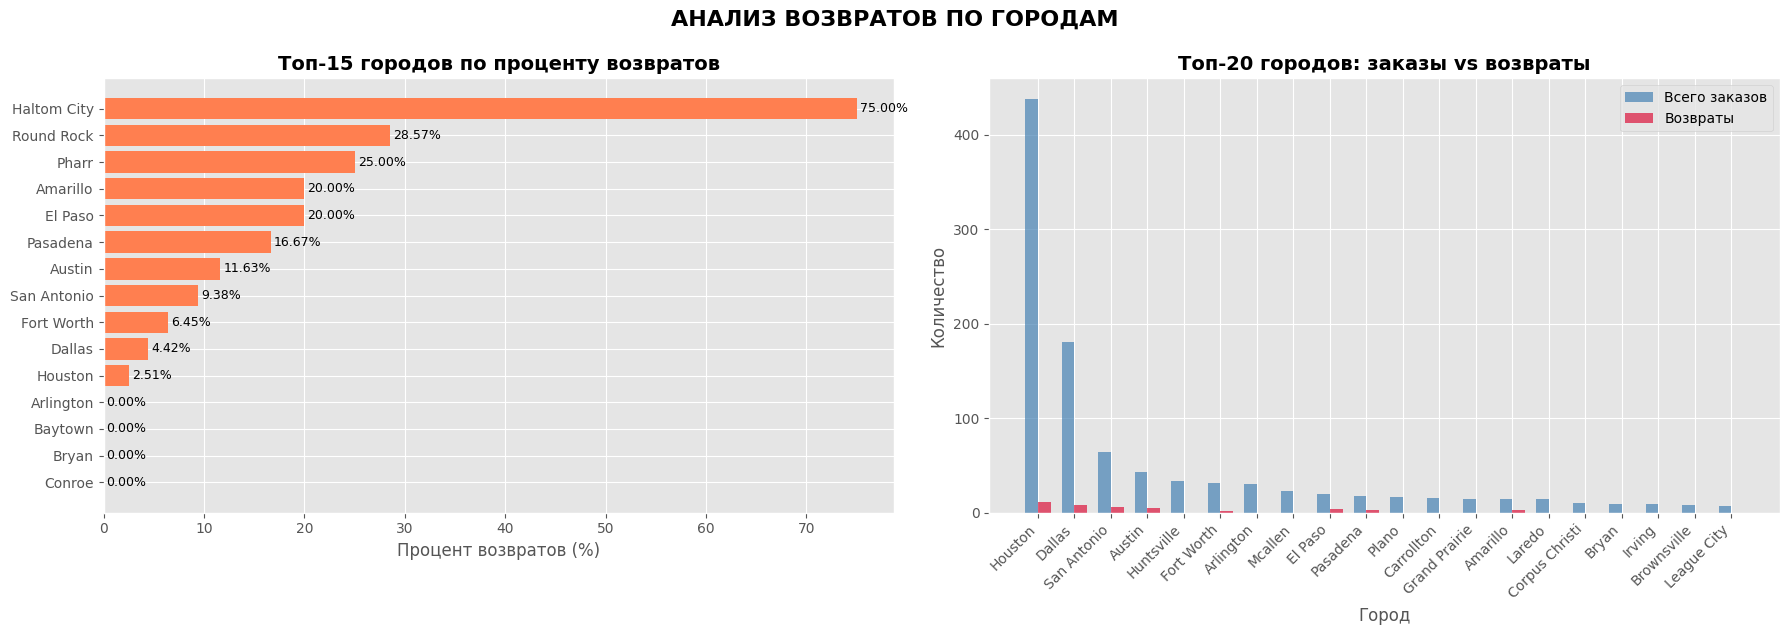

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Топ-15 городов по проценту возвратов
top15_rate = city_returns.head(15)
bars1 = axes[0].barh(top15_rate['city'], top15_rate['return_rate'], color='coral')
axes[0].set_xlabel('Процент возвратов (%)')
axes[0].set_title('Топ-15 городов по проценту возвратов', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

for i, (bar, val) in enumerate(zip(bars1, top15_rate['return_rate'])):
    axes[0].text(val + 0.3, bar.get_y() + bar.get_height()/2,
                    f'{val:.2f}%', va='center', fontsize=9)

# 3. Соотношение заказов и возвратов (топ-20 по заказам)
top20_orders = city_returns.sort_values('total_orders', ascending=False).head(20)
x = np.arange(len(top20_orders['city']))
width = 0.35

bars3_1 = axes[1].bar(x - width/2, top20_orders['total_orders'], width,
                          label='Всего заказов', color='steelblue', alpha=0.7)
bars3_2 = axes[1].bar(x + width/2, top20_orders['returned_orders'], width,
                          label='Возвраты', color='crimson', alpha=0.7)

axes[1].set_xlabel('Город')
axes[1].set_ylabel('Количество')
axes[1].set_title('Топ-20 городов: заказы vs возвраты', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(top20_orders['city'], rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.suptitle('АНАЛИЗ ВОЗВРАТОВ ПО ГОРОДАМ', y=1.05, fontsize=16, fontweight='bold')
plt.show()

In [ ]:


df_subcategory = pd.read_sql(query_returns, connection)
print("Данные по подкатегориям загружены. Размер:", df_subcategory.shape)
print(f"Всего записей: {len(df_subcategory)}")

df_sub = df_subcategory[df_subcategory['sub_category'].notna() & (df_subcategory['sub_category'] != '')].copy()
print(f"Записей с подкатегориями: {len(df_sub)}")
print(f"Уникальных подкатегорий: {df_sub['sub_category'].nunique()}")
df_sub.head()

Данные по подкатегориям загружены. Размер: (1129, 20)
Всего записей: 1129
Записей с подкатегориями: 570
Уникальных подкатегорий: 17


,row_id,order_date,ship_date,ship_mode,sales,quantity,discount,profit,returned,state,city,product_id,product_id,customer_name,segment,country,region,category,sub_category,product_name
0,15,2017-11-22,2017-11-26,Standard Class,68.81,5,0.8,-123.86,NaN,Texas,Fort Worth,OFF-AP-10002311,OFF-AP-10002311,Harold Pawlan,Home Office,United States,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...
1,16,2017-11-22,2017-11-26,Standard Class,2.54,3,0.8,-3.82,NaN,Texas,Fort Worth,OFF-BI-10000756,OFF-BI-10000756,Joe Kamberova,Consumer,United States,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders
2,35,2019-10-19,2019-10-23,Second Class,29.47,3,0.2,9.95,NaN,Texas,Houston,OFF-PA-10000249,OFF-PA-10000249,Susan Gilcrest,Corporate,United States,Central,Office Supplies,Paper,Easy-staple paper
3,35,2019-10-19,2019-10-23,Second Class,29.47,3,0.2,9.95,NaN,Texas,Houston,OFF-PA-10000249,OFF-PA-10000249,Matt Abelman,Home Office,United States,Central,Office Supplies,Paper,Easy-staple paper
4,36,2018-12-08,2018-12-10,First Class,1097.54,7,0.2,123.47,NaN,Texas,Richardson,TEC-PH-10004977,None,None,None,None,None,Technology,Phones,GE 30524EE4


In [ ]:
# Анализ по подкатегориям
subcategory_stats = df_sub.groupby('sub_category').agg({
    'row_id': 'count',
    'returned': 'sum',
    'sales': 'sum',
    'quantity': 'sum',
    'profit': 'sum'
}).reset_index()

subcategory_stats.columns = ['sub_category', 'total_orders', 'returned_orders', 'total_sales', 'total_quantity', 'total_profit']
subcategory_stats['return_rate'] = (subcategory_stats['returned_orders'] / subcategory_stats['total_orders'] * 100).round(2)
subcategory_stats['avg_order_value'] = (subcategory_stats['total_sales'] / subcategory_stats['total_orders']).round(2)
subcategory_stats['avg_profit_per_order'] = (subcategory_stats['total_profit'] / subcategory_stats['total_orders']).round(2)
subcategory_stats['profit_margin'] = (subcategory_stats['total_profit'] / subcategory_stats['total_sales'] * 100).round(2)

# Сортируем по проценту возвратов (от большего к меньшему)
subcategory_stats = subcategory_stats.sort_values('return_rate', ascending=False)

print("СТАТИСТИКА ПО ПОДКАТЕГОРИЯМ ТОВАРОВ:")
print("=" * 100)
print(subcategory_stats.to_string(index=False))


СТАТИСТИКА ПО ПОДКАТЕГОРИЯМ ТОВАРОВ:
sub_category  total_orders  returned_orders  total_sales  total_quantity  total_profit  return_rate  avg_order_value  avg_profit_per_order  profit_margin
    Supplies             8              1.0      4064.80              19       -792.18        12.50           508.10                -99.02         -19.49
     Binders            88              7.0      6748.52             377     -11037.33         7.95            76.69               -125.42        -163.55
         Art            49              3.0      1715.97             176        226.65         6.12            35.02                  4.63          13.21
   Bookcases            18              1.0      8749.45              59       -584.75         5.56           486.08                -32.49          -6.68
     Storage            56              3.0      9227.53             227       -572.48         5.36           164.78                -10.22          -6.20
      Tables            19             

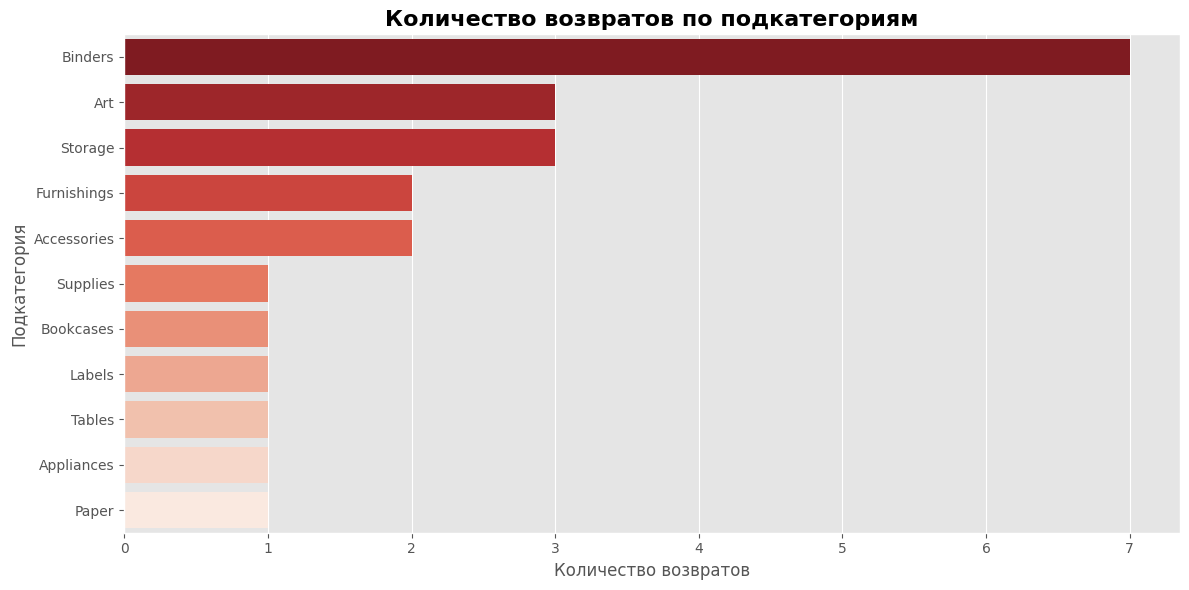

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Берем все подкатегории с возвратами
sub_with_returns = subcategory_stats[subcategory_stats['returned_orders'] > 0].copy()
sub_with_returns = sub_with_returns.sort_values('returned_orders', ascending=False)

plt.figure(figsize=(12, max(6, len(sub_with_returns) * 0.3)))

# Горизонтальный barplot от seaborn
sns.barplot(data=sub_with_returns,
            y='sub_category',
            x='returned_orders',
            palette='Reds_r')

plt.xlabel('Количество возвратов', fontsize=12)
plt.ylabel('Подкатегория', fontsize=12)
plt.title('Количество возвратов по подкатегориям', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()